# Stroke Prediction Dataset
## Прогнозирование инсульта 

Проект выполняют: Галстян Сухарев

Данные используется для прогнозирования вероятности инсульта у пациента на основе таких входных параметров, как пол, возраст, различные заболевания и статус курения. В данных есть информация о 5110 пациентах, у части из них уже был инсульт. Датасет взят из сайта Kaggle - https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Цель проекта: исследование закономерности различных показателей для установления факторов риска получения инсульта. 

### Переменные и их типы
1.  id: личный номер пациента (удаленный столбец, но количественное дискретное, принимает только строго определенные целочисленные значения)
2. gender: пол пациента ("Male", "Female" or "Other") - качественное номинальное, принимает строго определенные качественные (то есть характеризующие предмет) значения, которые нельзя сравнить друг с другом и упорядочить(мы не можем сранивать мужчин и женщин, как например, степени ожога)
3. age: возраст - количественное непрерывное, может принимать любые значения, целочисленные и дробные 
4.  hypertension: есть ли у пациента гипертония (0, если нет, 1, если есть) - качественное номинальное бинарное - принимает два строго определенных противоположныых значения (в скобках выше). 
5. heart_disease: болезни сердца (0, если нет, 1 если есть) - качественное номинальное бинарное - принимает два строго определенных противоположныых значения (в скобках выше).
6. ever_married: женат/замужем ли пациент ("No" or "Yes") качественное номинальное бинарное - принимает два строго определенных противоположныых значения (в скобках выше).
7. work_type: трудоустройство("children", "Govt_jov" (государственная работа), "Never_worked", "Private" or "Self-employed"(частный предприниматель)) - качественное номинальное, принимает строго определенные качественные (то есть характеризующие предмет) значения, которые нельзя сравнить друг с другом (мы не можем сравнить места работы и их упорядочить)
8. Residence_type: место жительства ("Rural" - в деревне or "Urban" - в городе) - качественное номинальное, принимает строго определенные качественные (то есть характеризующие предмет) значения, которые нельзя сравнить друг с другом (мы не можем сравнить места жительства и их упорядочить)
9. avg_glucose_level: средний уровень глюкозы в крови - количественное непрерывное, может принимать любые значения, целочисленные и дробные 
10. bmi: индекс массы тела - количественное непрерывное, может принимать любые значения, целочисленные и дробные 
11. smoking_status: статус курения ("formerly smoked" - курил в прошлом, "never smoked", "smokes" or "Unknown" - нет информации) - качественное номинальное, принимает строго определенные качественные (то есть характеризующие предмет) значения, которые нельзя сравнить друг с другом. Мы думали над тем, что это могут быть порядковые переменные, но как их правильно упорядочить? поэтому склоняемся к номинальным. 
12. stroke: был инсульт или нет(1, если да, 0, если нет) - качественное номинальное бинарное - принимает два строго определенных противоположныых значения (в скобках выше).

### Новые переменные и их типы

1. endocrinologist_need - необходимость посещения врача ('True', если нужно, 'False', если не нужно) - качественное номинальное бинарное - принимает два строго определенных противоположныых значения (в скобках выше).
2. age_periodization - ранжирование возраста пациентов ('Несовершеннолетние', '18-30', '31-40', '41-55', 'Пожилые люди') - качественное порядковое (можно сравнить и однозначно упорядочить, кто старше и младше) 
3. cardiovascular_diseases_risk - риск сердечно-сосудистых заболеваний ('Risk', если есть риск, 'No risk', если риска нет) - качественное номинальное бинарное - принимает два строго определенных противоположныых значения (в скобках выше).


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats
import numpy as np

In [7]:
import pandas as pd 
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data 

FileNotFoundError: [Errno 2] No such file or directory: 'healthcare-dataset-stroke-data.csv'

In [9]:
# Удалим колонку с личным номером пациента, так как эта информация не важна для нашего исследования.
del data['id']

В начале посмотрим, у скольких пациентов был или не был инсульт. Это поможет нам сделать правильные выводы после фильтрации и сортировки.

In [3]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

У 4861 человека инсульта не было, а у 249 - был. 

# Этап 1

## Фильтрация 

**Гипотеза 1: по данным медицинских сайтов, более 60% инсультов приходится на людей старше 60. Мы можем предположить, что пациентов такого возраста будет много в наших данных (более 50%). Они часто проверяют свое здоровье, так как находятся в зоне риска**. 

In [131]:
data[data['age'] >= 60].shape

(1376, 12)

Гипотеза не подтвердилась, из 5110 пациентов всего 1376 людей 60 лет и старше. 

Однако у скольких из них был инсульт?

In [125]:
data[(data['age'] >= 60)&(data['stroke'] == 1)].shape[0]

181

У 181 пациента из 249 человек, получивших инсульт, возраст равен 60 лет и выше. Можно предположить, что возраст влияет на получение инсульта. Тем не менее из 1376 человек старше 60, 181 - небольшой показатель. 

**Гипотеза 2: существует мнение, что инсульту больше предрасположены мужчины. Рассмотрим, сколько пациентов-мужчин в наших данных. Предполагаем, что мужчин должно быть больше женщин.**  

In [144]:
data[data['gender'] == 'Male'].shape[0]

2115

Гипотеза не подтвердилась. Из 5110 пациентов только 2115 являются мужчинами, это меньше 50%. 

Получается, что в данных много информации о женщинах.

In [143]:
data[data['gender'] == 'Female'].shape[0]

2994

В наших данных есть информация о 2994 женщинах(математически можем выяснить, что в наших данных всего 1 пациент другого пола "other")

**Гипотеза 3: в наших данных будет мало пациентов из сельской местности. Предполагаем, что это связано с тем, что у них нет возможности часто наблюдаться в больницах или среди них мало людей, получивших инсульт (выясним это дальше)**

In [142]:
data[data['Residence_type'] == 'Rural'].shape[0]

2514

Гипотеза не подтвердилась (2514 человек из 5110). В наших данных городские и сельские жители распределены примерно поровну. 

In [141]:
data[(data['Residence_type'] == 'Rural')&(data['stroke'] == 1)].shape[0]

114

Однако подтвердилась часть гипотезы о том, что у сельских жителей редко бывает инсульт (инсульт был у 114 человек из 2514) 

**Гипотеза 4: среди 249 пациентов, у которых был инсульт, у большей части будет высокий уровень глюкозы в крови (больше 109.8, данные с мед.сайтов) или избыточный индекс массы (больше 30). Эти показатели помогают определить наличие сахарного диабета и сидячего образа жизни, оба фактора являются риском получения инсульта.**

In [145]:
data[(data['stroke']==1)
     &((data['avg_glucose_level'] >= 109.8)
     |(data['bmi']>=30))].shape[0]

155

Гипотеза подтвердилась, более 50% пациентов(155 из 249), получивших инсульт, страдают от сахарного диабета или ведут сидячий образ. Можем сделать вывод о том, что пациенты, у которых инсульта не было, находятся в зоне риска, если имеют те же медицинские показатели. 

**Гипотеза 5: из 4681 пациентов, не получивших инсульт, большая часть не имеет гипертонии (серьезный фактор получения инсульта) и не находятся на госслужбе, стресс на государственной работе большой, и он может привести к развитию гипертонии.**

In [146]:
data[(data['stroke'] == 0)
& (data['hypertension'] == 0)
& (data['work_type'] != 'Govt_job')].shape[0]

3870

Гипотеза подтвердилась (3870 человек из 4681). Мы выделили еще несколько возможных факторов получения инсульта: гипертония и стресс. 

Однако сколько людей, получивших инсульт, имеют эти признаки?


In [147]:
data[(data['stroke'] == 1)
& (data['hypertension'] == 1)
& (data['work_type'] == 'Govt_job')].shape[0]

8

8 человек из 249, получивших инсульт, страдают от гипертонии и работают в госорганах, где большой уровень стресса. Получается, что гипертония и работа в госорганах в совокупности не являются первичными факторами риска. 

Рассмотрим, а сколько людей, получивших инсульт, страдают от гипертонии. **Гипотеза 6: Предполагаем, что отдельно от фактора трудоустройства, гипертония сыграет большую роль в получении инсульта**

In [148]:
data[(data['stroke'] == 1)
& (data['hypertension'] == 1)].shape[0]

66

 Гипотеза не подтвердилась. Только у 66 человек среди 249 имеют гипертонию и получили инсульт. Возможно гипертония сыграет серьезную роль в получении инсульта в совокупности с другими признаками.

## Сортировка 

In [29]:
data.sort_values(by = 'age', ascending = False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3108,Male,82.00,0,0,No,Self-employed,Urban,161.95,30.8,never smoked,0
188,Male,82.00,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
1515,Female,82.00,0,0,Yes,Govt_job,Rural,58.30,20.4,never smoked,0
1412,Male,82.00,1,0,Yes,Private,Rural,227.28,33.3,never smoked,0
1951,Female,82.00,0,0,Yes,Private,Urban,99.68,22.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
3618,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3968,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4021,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


Самым взрослым пациентам 82 года. При этом у нескольких их них не было инсульта, хотя есть сахарный диабет и избыточный индекс тела. Мы также заметили женщину (у неё был инсульт), которой 82 года, и у неё довольно низкий уровень глюкозы в крови (58.30). Это тоже не очень хороший показатель: низкий уровень сахара - это тяжелое заболевание под названием "гипогликемия" (когда уровень глюкозы меньше 63).  

In [32]:
data.sort_values(by = 'avg_glucose_level', ascending = True)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4886,Female,21.0,0,0,No,Private,Rural,55.12,21.8,never smoked,0
1191,Male,42.0,0,0,Yes,Private,Urban,55.22,27.0,never smoked,0
4110,Male,66.0,0,0,Yes,Self-employed,Rural,55.23,28.9,Unknown,0
682,Male,20.0,0,0,No,Private,Urban,55.25,20.4,never smoked,0
772,Male,61.0,0,0,Yes,Private,Rural,55.26,33.2,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
2462,Female,60.0,0,0,No,Govt_job,Rural,266.59,25.5,never smoked,0
4983,Male,76.0,1,0,Yes,Private,Rural,267.60,30.5,never smoked,0
3088,Female,76.0,0,0,Yes,Self-employed,Urban,267.61,27.9,smokes,0
1207,Female,49.0,0,0,Yes,Private,Urban,267.76,29.3,formerly smoked,0


Показатели уровня глюкозы в крови у 82-летней женщины нас заинтересовали. Мы решили посмотреть, у какого пациента самый маленький уровень глюкозы в крови. Им оказалась 21-летняя женщина. Уровень глюкозы в крови составляет 55.12, при этом инсульта у нее еще не было. 

**Рассмотрим, а может ли низкий уровень глюкозы влиять на инсульт?**

In [149]:
data[(data['stroke']==1)
     &(data['avg_glucose_level'] < 63)].shape[0]

16

16 из 249 пациентов, получивших инстульт, имеют гипогликемию. Возможно, это и влияет на инсульт, но не является серьезным фактором. 

In [150]:
data.sort_values(by = 'bmi', ascending = False)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2128,56420,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0
4209,51856,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0
928,41097,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0
544,545,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0
1559,37759,Female,53.0,0,0,Yes,Private,Rural,72.63,66.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


Пациенту с самым высоким индексом массы тела 17 лет. У подростка ожирение 3 степени, при этом низкий уровень глюкозы в крови (возможно у него был был высокий уровень глюкозы, но оно понизилось после приема специальных препаратов, отсюда и ожирение). При этом инсульта у него не было, но есть гипертония, которая может быть спровоцирована ожирением. 

In [38]:
data.sort_values(by = ['stroke', 'age'], ascending = [False, True])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
182,Female,32.00,0,0,Yes,Private,Rural,76.13,29.9,smokes,1
118,Female,38.00,0,0,No,Self-employed,Urban,82.28,24.0,formerly smoked,1
133,Female,38.00,0,0,Yes,Private,Rural,101.45,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4716,Female,82.00,0,0,No,Private,Rural,96.98,21.5,never smoked,0
4763,Male,82.00,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
4819,Female,82.00,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5062,Female,82.00,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0


Сортировка по  переменным возраста и был ли инсульт показала, что самому молодому пациенту, у которого был инсульт, полтора года. При этом у него нет никаких сердеченых заболеваний и гипертонии, а уровень глюкозы у него нормальный. Остается догадываться, почему у ребенка произошел инсульт. 

In [60]:
data.sort_values(by = ['stroke', 'heart_disease', 'age'], ascending = [False, False, True])

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,endocrinologist_visit
217,Female,55.0,1,1,Yes,Private,Urban,210.40,40.0,smokes,1,Need
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1,Need
225,Female,57.0,0,1,Yes,Private,Urban,216.58,31.0,Unknown,1,Need
97,Male,58.0,0,1,Yes,Private,Rural,240.59,31.4,smokes,1,Need
239,Male,60.0,0,1,Yes,Private,Urban,91.92,35.9,smokes,1,No need
...,...,...,...,...,...,...,...,...,...,...,...,...
4716,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0,No need
4763,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0,Need
4819,Female,82.0,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0,Need
5062,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0,Need


 Интересно рассмотреть, как сердечные заболевания влияют на инсульт. Сортировка показала, что пациенту с болезнями сердца и инсультом, было 55 лет. На примере этого пациента мы можем наглядно увидеть действие всех факторов в совокупности: гипертонии, сердечных заболеваний, выского уровня глюкозы и индекса массы тела. Вместе эти признаки приводят к инсульту. Как мы уже говорили раннее, не все признаки "работают" по отдельности, но вместе - в большинстве случаев. 

## Создание переменной 

Создадим переменную, которая при высоком или низком уровне глюкозы крови, пропишет необходимость посещения эндокринолога или нет, в случае, если условия не удовлетворяются. 

In [151]:
data['endocrinologist_need'] = ((data['avg_glucose_level'] >= 109.8)|(data['avg_glucose_level'] < 63))

Создадим переменную, где проранжируем возраст пациентов

In [234]:
def age_range(value):
    if value < 18:
        value = 'Несовершеннолетние' 
    elif value >= 18 and value <= 30:
        value = '18-30'
    elif value > 30 and value <= 40:
        value = '31-40'
    elif value > 40 and value <= 55:
        value = '41-55'
    elif value > 55:
        value = 'Пожилые люди'
    return value

In [235]:
data['age_periodization'] = data['age'].apply(age_range)

Создадим переменную, которая при условии наличия у пациента гипертонии и сердечных болезней, а также статуса "курил" или "курит", пропишет риск сердечно-сосудистых заболеваний или нет, в ином случае.

In [154]:
data['cardiovascular_diseases_risk'] = ((data['hypertension'] == 1)
&(data['heart_disease']==1)
&((data['smoking_status'] == 'formerly smoked')
|(data['smoking_status'] == 'smokes'))).apply(lambda x: 'Risk' if x == True else 'No risk')

# Этап 2


## Частотные таблицы

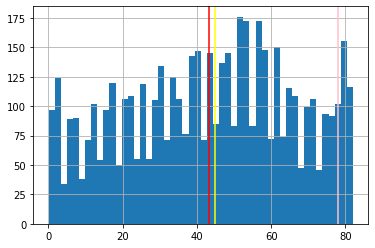

In [41]:
age_mean = data['age'].mean()
age_mode = data['age'].mode()[0] 
age_median = data['age'].median()
data['age'].hist(bins = 50)
# Показываем на графике среднее арифметическое (красный цвет)
plt.axline((age_mean, 0), (age_mean, 10), color = 'red')
# Показываем на графике моду (розовый цвет)
plt.axline((age_mode, 0), (age_mode, 10), color = 'pink')
# Показываем на графике медиану (желтый цвет)
plt.axline((age_median, 0), (age_median, 10), color = 'yellow')

Гистограмма создана по переменной возраста пациентов. В общем, можно сказать, что распределение достаточно симметричное, медиана и среднее не сильно отличаются друг от друга(красная и желтая полоса), выбивающихся аномальных значений нет.  

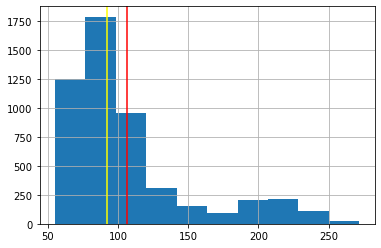

In [42]:
agl_median = data['avg_glucose_level'].median()
agl_mean = data['avg_glucose_level'].mean()
data['avg_glucose_level'].hist(bins = 10)
# Показываем на графике среднее арифметическое (красный цвет)
plt.axline((agl_mean, 0), (agl_mean, 10), color = 'red')
# Показываем на графике медиану (желтый цвет)
plt.axline((agl_median, 0), (agl_median, 10), color = 'yellow')

В гистограмме, созданной по уровеню глюкозы в крови, мы видим другую ситуацию. В целом значения находятся в промежутке от примерно 70 до 100. Однако распределение несимметричное, есть выбросы в правой стороне графика, которые перетягивают среднее (красное) в большую сторону (вправо) от медианы(желтое).  

<AxesSubplot:ylabel='smoking_status'>

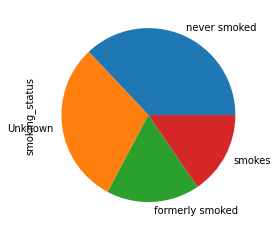

In [112]:
data['smoking_status'].value_counts().plot(kind='pie')

Как мы уже говорили раннее, курение может спровоцировать гипертонию, и в целом влиять на сердечно-сосудистую систему, что может стать риском для получения инсульта. Круговая диаграмма по статусу курения показала, что в наших данных достаточно много пропущенных данных о статусе курения (это не NaN, а строка 'unknown'), но при этом еще больше никогда не курящих пациентов. Куривших в прошлом и курящих в настоящем - примерно одинаковое количество. 

 Интересно посмотреть, как курение отразилось на приступах инсульта, среди 249 людей, получивших его. 

In [113]:
data[(data['stroke'] == 1)
    &((data['smoking_status'] == 'formerly smoked')
    |(data['smoking_status'] == 'smokes'))].shape[0]

112

Почти половина пациентов, получивших инсульт, (112 человек из 249) курят или курили в прошлом. Можно сделать вывод, что курение действительно можем повлиять на получение человеком инсульта. 

In [1]:
data.groupby('age_periodization')['bmi'].mean().sort_values().plot(kind='bar', key = x)

NameError: name 'data' is not defined

Мы раннее также отмечали важность рассмотрения индекса массы тела у пациентов, так как он зачастую идет вместе с сахарным диабетом и говорит о сидячем малоподвижном образе жизни. Столбчатая диаграмма показала средний индекс тела у людей разных возрастных рангов. График показал, что большие индексы масса тела встречаются чаще всего у у пожилых людей и у пациентов в возрасте 41-55 лет. При этом у детей, у 18-30 и 31-40-летних пациентов примерно одинаковые результаты. 

### Частотные таблицы по отфильтрованным данным 

Сердечные заболевания являются важным фактором, который появляется часто у пожилых людей (мы уже проводили фильтровку по возрасту). Посмотрим, сколько людей старше 60 лет страдают от сердечных заболеваний. Помним, что людей такого возраста в наших данных 1376 человека. 

<AxesSubplot:ylabel='heart_disease'>

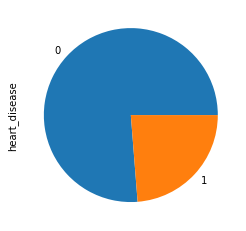

In [123]:
data[(data['age'] >= 60)&(data['stroke'] == 1)]['heart_disease'].value_counts().plot(kind='pie')

Эта диаграмма построена по отфильтрованным данным (пациенты старше 60) и рассматривает информацию о сердечных заболеваниях среди этих пациентов. Диаграмма показала, что значительная часть пациентов не имеют сердечных заболеваний, получается, что при получении инсульта болезни сердца не первостепенный признак, небольшая часть пациентов старше 60 лет страдает от подобных заболеваний (на диаграмме под цифрой 1)

Далее рассмотрим, как влияет на получение инсульта гипертония в совокупности с достаточно сильным фактором - с сахарным диабетом. 

<AxesSubplot:>

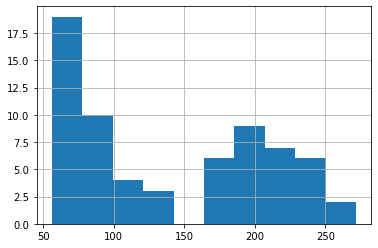

In [127]:
data[(data['stroke'] == 1)
& (data['hypertension'] == 1)]['avg_glucose_level'].hist()

График показал интересный результат. У людей, у которых был инсульт и есть гипертония, чаще всего бывает низкое давление (примерно 50 мг/дл), высокий уровень глюкозы встречается реже. Такие результаты довольно запутывают поиск взаимосвязей факторов риска. 
При этом график выглядит несимметрично, кажется, что есть выбросы в правой стороне, которые перетянут среднее в большую сторону. 

Мы уже рассмотрели, что женщин в нашем датасете, больше мужчин. Однако посмотрим, сколько женщин и мужчин получили инсульт и сравним результаты. 

In [144]:
female = data[data['gender'] == 'Female']['stroke']
male = data[data['gender'] == 'Male']['stroke']


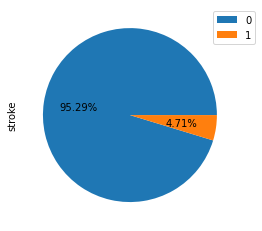

In [143]:
female.value_counts().plot(kind='pie', autopct='%.2f%%', 
                                    labeldistance = None).legend(loc='upper right', bbox_to_anchor=(1.1, 1))

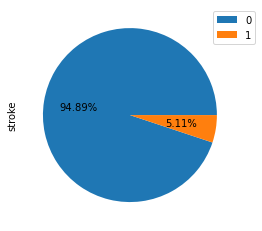

In [145]:
male.value_counts().plot(kind='pie', autopct='%.2f%%', 
                                    labeldistance = None).legend(loc='upper right', bbox_to_anchor=(1.1, 1))

Основываясь на двух круговых диаграмах, мы можем сделать вывод, что несмотря на то, что количество мужчин и женщин в датасете разное, в процентном соотношении получения инсульта мужчины и женщины схожи (5.11% и 4.71% соответственно). Делаем вывод, что мужчины и женщины в равной степени подвержены получению инсульта, и общественное мнение о том, что инсульту предрасположены в большей мере только мужчины, можно считать ошибчным. 

## Группировка данных и МЦТ

## Первая группировка

In [7]:
data.groupby('age_periodization')[['bmi', 'avg_glucose_level']].mean()

,bmi,avg_glucose_level
age_periodization,,
18-30,28.011286,94.106232
31-40,31.223457,98.938190
41-55,31.663845,104.907256
Несовершеннолетние,21.392703,94.385981
Пожилые люди,30.298617,120.874145


In [8]:
data.groupby('age_periodization')[['bmi', 'avg_glucose_level']].median()

,bmi,avg_glucose_level
age_periodization,,
18-30,26.4,88.865
31-40,29.9,88.890
41-55,30.2,92.675
Несовершеннолетние,19.9,89.075
Пожилые люди,29.5,96.330


Мы провели группировку по переменным "ранжированного возраста", уровня глюкозы и индкекса массы тела. В первой таблице мы посчитали среднее для индекса массы тела и уровня глюкозы, во второй - медиану. Мы заметили, что в данном случае среднее для обех переменных больше медианы. Это значит, что распределение данных ассиметрично положительное, есть много больших аномальных значений, которые перетягивают среднее в большую сторону (на графике среднее ушло бы вправо). В данном случае лучше всего использовать медиану, которая не так зависит от аномальных значений, как среднее. 

Найти моду не представилось возможным, так как в pandas нет нужной функции. Однако отсутствие моды не сильно нам помешает. Среднее и медиана уже дали нам вполне полное представление о распределении. 

## Вторая группировка

In [138]:
data.groupby('gender')['age'].mean()

gender
Female    43.757395
Male      42.483385
Other     26.000000
Name: age, dtype: float64

In [10]:
data.groupby('gender')['age'].median()

gender
Female    44.0
Male      46.0
Other     26.0
Name: age, dtype: float64

In [12]:
data.groupby('gender')['age'].value_counts()['Male']

age
57.00    44
55.00    42
78.00    42
54.00    39
59.00    38
         ..
0.40      1
0.48      1
1.24      1
1.40      1
1.48      1
Name: age, Length: 103, dtype: int64

Чаще всего в данных встречаются 57-летние мужчины. Таким образом мы нашли моду. 

In [13]:
data.groupby('gender')['age'].value_counts()['Female']

age
45.00    61
78.00    60
79.00    59
50.00    55
51.00    54
         ..
0.56      1
0.80      1
0.88      1
1.00      1
1.72      1
Name: age, Length: 102, dtype: int64

Чаще всего в данных встречаются 45-летние женщины. Таким образом мы нашли моду.

In [14]:
data[data['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,endocrinologist_need,age_periodization,cardiovascular_diseases_risk
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,True,18-30,No risk


Считать моду пола other смысла не имеет, так как у нас только один пациент, которому 26 лет. 

Мы провели группировку по переменным пола и возраста. Можно сказать, что распределение возраста по женскому довольно симметричное, так как медиана, среднее и мода почти одинаковы (43.8, 44 и 44 соответственно). По мужскому полу виднеется небольшая ассиметрия: среднее меньше медианы (среднее 42.5, медиана - 46), а мода слишком большая (57). Можно сказать, что на среднее повлияли несколько маленьких аномальных значений, которые и сделали его меньше. Тем не менее в обоих распределениях (и по мужчинам, и по женщинам) можно использовать все три меры центральной тенденции, сильных искажений нет. 

## Ящик с усами

Создавая гистограмму для переменной уровня глюкозы, мы заметили, что распределение несимметричное. Рассмотрим его с помощью ящика с усами. 

<AxesSubplot:xlabel='avg_glucose_level'>

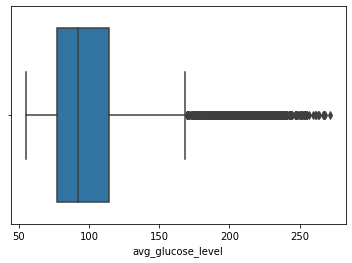

In [15]:
sns.boxplot(x=data['avg_glucose_level'])

**Интерпретация графика:**
1. Нижняя граница равна 50, при этом за границей выбросов нет. 
2. Верхняя граница равна примерно 160-170, при этом за ней находится много выбросов, от верхней границы и до более 250. 
3. Синий ящичек показывает, где находятся центральные значения. Центральные значения данной переменной находятся в промежутке от примерно 70 до 120. 
4. Медина равна примерно 90
5. Первый квартиль равна примерно 70
6. Третья квартиль равна примерно 120. 
7. Выбросы есть только за верхней границей, и их достаточно много. Распределение получается ассиметрично положительным, соответстенно среднее будет больше медианы. 

# Этап 3

## Пропущенные значения

Посмотрим, в каких переменных есть пропущенные значения 

In [215]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

У нас есть 201 пропущенное значение в переменной индекса массы тела. Чтобы понять, какую меру лучше использовать, визуализируем распределение значений в этой переменной с помощью гистограммы. 

<AxesSubplot:>

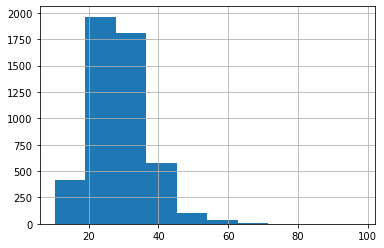

In [26]:
data['bmi'].hist()

Мы видим, что распределение значений довольно симметричное. Следовательно, все 3 мцт должны не сильно отличаться друг от друга. Проверим это. 

In [165]:
mean = data['bmi'].mean()
median = data['bmi'].median()
mode = data['bmi'].mode()
mean, median, mode[0]


(28.893236911794673, 28.1, 28.7)

Меры центральной тенденции действительно не сильно отличаются друг от друга. Среднее чуть больше медианы, это говорит о том, что есть небольшое количество выбросов, смещающие среднее в большую сторону. Для пропущенных значений можно использовать медиану, которая не так сильно зависит от выбросов. 

In [216]:
data['bmi'].fillna(median, inplace = True)

## Выбросы

Выбросы найдем по 3 числовым переменным: возрасту, уровню глюкозы и индексу массы тела. 

### Возраст

**Интерквартильный размах**

In [155]:
q1_age = np.percentile(data['age'], 25)
q3_age = np.percentile(data['age'], 75)
iqr_age=q3_age - q1_age
# Нижняя граница
bottom_age = q1_age - 1.5*iqr_age
# Верхняя границы
top_age = q3_age + 1.5*iqr_age
bottom_age, top_age

(-29.0, 115.0)

Мы нашли верхние и нижние границы распределения. Нижняя граница является отрицательным числом, предполагаем, что выбросов за нижней границей может и не быть. 

In [156]:
data[(data['age'] < bottom_age) | (data['age'] > top_age)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,endocrinologist_need,age_periodization,cardiovascular_diseases_risk


Выбросов в переменной возраста нет. Однако мы посчитали выбросы по интерквартильному размаху, посмотрим, что будет, если посчитать с помощью стандартного отклонения (а именно 3 стандартных отклонений)

**Стандартное отклонение**

In [158]:
mean_age = data['age'].mean()
std_age = data['age'].std(ddof=0)
# Нижняя граница
bottom1_age = mean_age - 3*std_age
# Верхняя граница
top1_age = mean_age + 3*std_age
bottom1_age, top1_age

(-24.604687599930017, 111.05791656274805)

Мы нашли верхние и нижние границы распределения. Нижняя граница вновь представлена отрицательным числом, предполагаем, что выбросов за нижней границей может и не быть.

In [157]:
data[(data['age'] < bottom1_age) | (data['age'] > top1_age)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,endocrinologist_need,age_periodization,cardiovascular_diseases_risk


Выбросов в переменной возраста нет и при расчете стандартного отклонения. Вспоминаем визуализированное с помощью гистограммы распределение, которое было достаточно симметричное. 

### Уровень глюкозы

**Интерквартильный размах**

In [217]:
q1_avg = np.percentile(data['avg_glucose_level'], 25)
q3_avg = np.percentile(data['avg_glucose_level'], 75)
iqr_avg = q3_avg - q1_avg
# Нижняя граница
bottom_avg = q1_avg - 1.5*iqr_avg
# Верхняя границы
top_avg = q3_avg + 1.5*iqr_avg
bottom_avg, top_avg

(21.977500000000006, 169.35750000000002)

In [160]:
data[(data['avg_glucose_level'] < bottom_avg) 
     | (data['avg_glucose_level'] > top_avg)].shape[0]

627

Количество выбросов по переменной уровня глюкозы равно 627. 

**Стандартное отклонение**

In [161]:
mean_avg = data['avg_glucose_level'].mean()
std_avg = data['avg_glucose_level'].std(ddof=0)
# Нижняя граница
bottom1_avg = mean_avg - 3*std_avg
# Верхняя граница
top1_avg = mean_avg + 3*std_avg
bottom1_avg, top1_avg

(-29.689710067458847, 241.9850642748949)

Видим, что по стандартному отклонению нижние и верхние границы сместились, следовательно, выбросов, возможно, будет меньше.

In [162]:
data[(data['avg_glucose_level'] < bottom1_avg) 
     | (data['avg_glucose_level'] > top1_avg)].shape[0]

49

Действительно, выбросов стало меньше - 49. 

Сравниваем результаты:
1. Границы, посчитанные по отклонению и размаху, отличаются. В нашем случае из-за этого по отклонению количество выбросов уменьшилось.
2. Выбросы, посчитанные по размаху, составляют 12.27% от общего количества наблюдений. 
3. Выбросы, посчитанные по отклонению, составляют 0.96% от общего количества наблюдений. 
4. Предполагаем, что на отклонение в большой степени влияют аномальные значения, которые и смещают границы, делая их больше, отодвигая их. Получается, что в данном случае лучше использовать интерквартильный размах. 

In [30]:
data[(data['avg_glucose_level'] < bottom_avg) 
     | (data['avg_glucose_level'] > top_avg)].shape[0]*100/data['avg_glucose_level'].size

12.270058708414872

In [105]:
data[(data['avg_glucose_level'] < bottom1_avg) 
     | (data['avg_glucose_level'] > top1_avg)].shape[0]*100/data['avg_glucose_level'].size

0.958904109589041

### Индекс массы тела 

**Интерквартильный размах**

In [218]:
q1_bmi = np.percentile(data['bmi'], 25)
q3_bmi = np.percentile(data['bmi'], 75)
iqr_bmi = q3_bmi - q1_bmi
# Нижняя граница
bottom_bmi = q1_bmi - 1.5*iqr_bmi
# Верхняя границы
top_bmi = q3_bmi + 1.5*iqr_bmi
bottom_bmi, top_bmi

(10.300000000000006, 46.29999999999999)

In [168]:
data[(data['bmi'] < bottom_bmi) 
     | (data['bmi'] > top_bmi)].shape[0]

126

Количество выбросов, посчитанных по размаху, равно 126. 

In [169]:
mean_bmi = data['bmi'].mean()
std_bmi = data['bmi'].std(ddof=0)
# Нижняя граница
bottom1_bmi = mean_bmi - 3*std_bmi
# Верхняя граница
top1_bmi = mean_bmi + 3*std_bmi
bottom1_bmi, top1_bmi

(5.765608524766606, 51.95846192533139)

Видим смещение границ, посчитанных по отклонению. Предполагаем уменьшение количества выбросов. 

In [170]:
data[(data['bmi'] < bottom1_bmi) 
     | (data['bmi'] > top1_bmi)].shape[0]

59

Количество выбросов, посчитанных по отклонению, равно 59. Действительно, их стало меньше.  

Сравниваем результаты:

1. Границы, посчитанные по отклонению и размаху, отличаются. В нашем случае из-за этого по отклонению количество выбросов уменьшилось.
2. Выбросы, посчитанные по размаху, составляют 2.47% от общего количества наблюдений.
3. Выбросы, посчитанные по отклонению, составляют 1.15% от общего количества наблюдений.
4. Предполагаем, что на отклонение в большой степени влияют аномальные значения, которые и смещают границы, делая их больше, отодвигая их. Получается, что в данном случае также лучше использовать интерквартильный размах. 

In [110]:
data[(data['bmi'] < bottom_bmi) 
     | (data['bmi'] > top_bmi)].shape[0]*100/data['bmi'].size

2.4657534246575343

In [111]:
data[(data['bmi'] < bottom1_bmi) 
     | (data['bmi'] > top1_bmi)].shape[0]*100/data['bmi'].size

1.1545988258317026

# Корреляция 

В наших данных всего 3 непрерывных переменных, между которыми можно построить корреляцию: уровень глюкозы, индекс массы тела и возраста.

Будем рассматривать корреляцию каждых пар двумя способами: с выбросами и без. Для этого создадим новый датасет, в котором не будет выбросов, рассчитанных по интерквартильному размаху по переменным уровня глюкозы и индекса массы тела (в переменной возраста, как мы уже смотрели, выбросов нет). 

In [219]:
new_data = data[((data['bmi'] < top_bmi)&(data['bmi'] > bottom_bmi))
     &((data['avg_glucose_level'] < top_avg)&(data['avg_glucose_level'] > bottom_avg))]

### Возраст и BMI

Предполагаем, что индекс массы тела зависит от возраста: чем больше возраст, тем больше индекс массы тела и наоборот.

In [113]:
data['age'].corr(data['bmi'])

0.3242956998386767

C выбросами коэффициент корреляции между индексом массы тела и возрастом положительный и равен 0.32. Связь между переменными умеренная. 

In [69]:
new_data['age'].corr(data['bmi'])

0.3753750221187875

Без выбросов коэффициент корреляции между индексом массы тела и возрастом положительный и равен 0.37. Связь между переменными умеренная(почти 0.4). Однако коэффициент стал больше, чем с выбросами. 

### BMI и уровень глюкозы

Предполагаем, что индекс массы тела зависит от уровня глюкозы: чем больше уровень глюкозы, тем больше и масса тела, так как сахарный диабет нарушает обмен вещест в организме 

In [115]:
data['avg_glucose_level'].corr(data['bmi'])

0.1668757218060619

C выбросами коэффициент корреляции между индексом массы тела и уровнем глюкозы положительный и равен 0.2. Связь между переменными слабая.

In [116]:
new_data['avg_glucose_level'].corr(data['bmi'])

0.0025133788569529337

Без выбросов коэффициент корреляции между индексом массы тела и уровнем глюкозы положительный и равен 0.0025. Связь между переменными очень слабая. Коэффициент без выбросов стал намного меньше, чем с выбросами. 

### Возраст и уровень глюкозы

Предполагаем, что уровень глюкозы зависит от возраста, например, в пожилом возрасте у людей часто падает сахар в крови. Возможно выделить следующую связь: чем больше возраст, тем меньше уровень глюкозы. 

In [117]:
data['age'].corr(data['avg_glucose_level'])

0.2381711141017434

C выбросами коэффициент корреляции между возрастом и уровнем глюкозы положительный и равен 0.2. Связь между переменными слабая.

In [118]:
new_data['age'].corr(data['avg_glucose_level'])

-0.024587273971391214

Без выбросов коэффициент корреляции между возрастом и уровнем глюкозы отрицательный и равен -0.026. Связь между переменными очень слабая. Коэффициент без выбросов стал больше, но поменялась и зависимость: стала обратной, отчасти подтвердив нашу гипотезу

С чем связано то, коэффицент не сильно, но изменялся в зависимости от наличия выбросов? Вообще выбросы влияют на коэффициент корреляции, так как при его подсчете большую роль играет то, насколько значения отклонены от среднего. Выбросы могут как снижать коэффицент, так и увеличивать его и даже менять связь с положительной на отрицательную. В нашем случае выбросы не сильно меняли коэффициент, возможно, из-за того, что их было не так много. Однако в одном случае (возраст и уровень глюкозы) поменялась зависимость. Это говорит о том, что выбросу могут скрывать и реальную зависимость между переменными. 

## Выбросы в сгруппированных данных

Чтобы посчитать меры мцт для сгруппированных данных без учёта выбросов, воспользуемся новым датасетом, в котором отсутствуют выбросы по переменным уровня глюкозы, индекса массы тела и возраста (их, как мы выяснили и нет, поэтому вторую группировку проверить мы не можем) и сравним с данными с выбросами. 

### Первая группировка

In [119]:
new_data.groupby('age_periodization')[['bmi', 'avg_glucose_level']].mean()

,bmi,avg_glucose_level
age_periodization,,
18-30,27.363476,91.399278
31-40,30.132397,91.296678
41-55,30.155378,91.978327
Несовершеннолетние,21.359521,92.369593
Пожилые люди,29.248975,90.620150


In [120]:
data.groupby('age_periodization')[['bmi', 'avg_glucose_level']].mean()

,bmi,avg_glucose_level
age_periodization,,
18-30,28.013025,94.106232
31-40,31.102967,98.938190
41-55,31.554188,104.907256
Несовершеннолетние,21.549416,94.385981
Пожилые люди,30.162500,120.874145


Мы видим, что без выбросов среднее стало меньше, чем с выбросами. Это связано с тем, что выбросы были большими аномальными значениями, которые влияли на среднее, делая его больше. При этом важно отметить, что много выбросов наблюдалось в показателях уровня глюкозы среди пациентов 41-55 лет и пожилого возраста. Среднее стало меньше на 13 и 30 единиц соответственно. 

In [121]:
new_data.groupby('age_periodization')[['bmi', 'avg_glucose_level']].median()

,bmi,avg_glucose_level
age_periodization,,
18-30,26.3,88.470
31-40,28.7,86.970
41-55,29.3,88.700
Несовершеннолетние,20.0,88.600
Пожилые люди,28.6,87.385


In [122]:
data.groupby('age_periodization')[['bmi', 'avg_glucose_level']].median()

,bmi,avg_glucose_level
age_periodization,,
18-30,26.55,88.865
31-40,29.30,88.890
41-55,29.90,92.675
Несовершеннолетние,20.00,89.075
Пожилые люди,29.10,96.330


Медиана не сильно изменилась из-за отсутствия выбросов, стала немного меньше. Это было ожидаемо, так как медиана не так зависит от выбросов, как среднее. Однако большое количество аномальных значений может повлиять на медиану. Так, мы видим, что в тех показателях, в которых было много выбросов и в которых среднее сильно меняется в зависимости от наличия выбросов, меняется и медиана, становясь меньше (например, в переменной уровня глюкозы у пожилых людей с выбросами медиана была примерно 96, без выбросов - 87)

В целом мы можем сказать, что без выбросов у пациентов нормальный уровень глюкозы в крови и нормальный индекс массы тела, ожирение в среднем у пациентов в возрасте 31-40, 41-55.  

## Этап 4

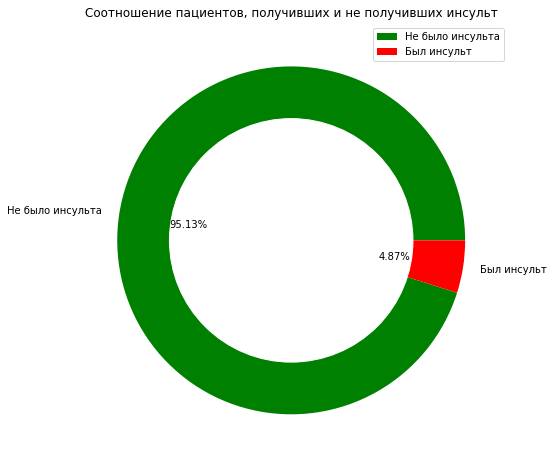

In [186]:
fig, ax = plt.subplots(figsize=[12,8])
ax.pie(data['stroke'].value_counts(), autopct='%.2f%%', labels = ['Не было инсульта', 'Был инсульт',], colors=['green','red'])
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
ax.legend()
ax.set_title('Соотношение пациентов, получивших и не получивших инсульт', fontsize = 12)
plt.show()

Такой интересной круговой диаграммой мы рассмотрели, сколько процентов пациентов получили инсульт, а сколько - нет. Видим, что в наших данных большинство пациентов не получали инсульт (95.13%), а 4.87 - получили. Тем важнее было для нас понять факторы риска, при которых человек, не получивший инсульт, может его получить. 

P.S. Этот график скорее сделан для защиты проекта, чтобы визуализировать соотношение. 

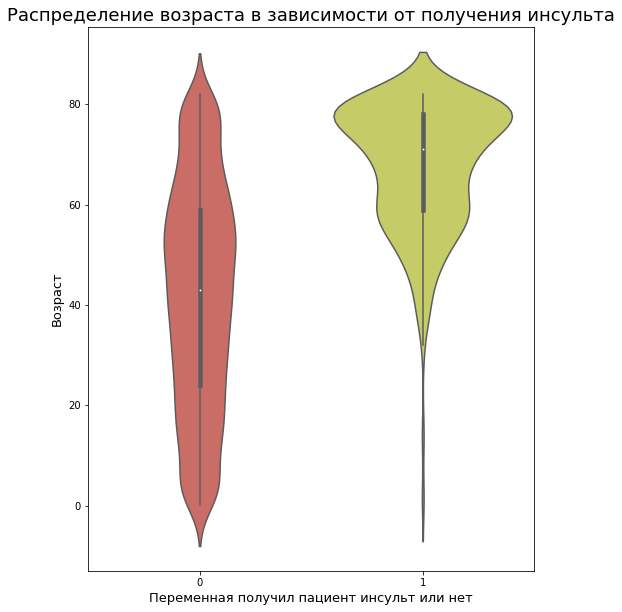

In [78]:
fig, ax = plt.subplots(figsize=[8,10])
sns.set_palette('hls')
sns.violinplot(x=data['stroke'], y=data['age'])
ax.set_title('Распределение возраста в зависимости от получения инсульта', fontsize = 18)
ax.set_ylabel('Возраст', fontsize=13)
ax.set_xlabel('Переменная получил пациент инсульт или нет', fontsize=13)
plt.show()

Одна из наших гипотез касалось того, влияет ли возраст на получение инсульта. С помощью диаграммы распределения возраста в зависимости от того, получил человек инсульт или нет, мы увидели следующее:

1. Возраст пациентов, получивших инсульт, в целом варьируется в пределах 40-80 лет, при этом возраст большинства пациентов находятся в интервале от 70-80 лет(видим расширение скрипичного ключа). Это подтверждает нашу гипотезу. 
2. Возраст пациентов, не получивших инсульт, охватывает почти все возраста (от 0 до 80 лет), при этом распределении возрастов в данном случае кажется более симметричном, нежели в другом. 

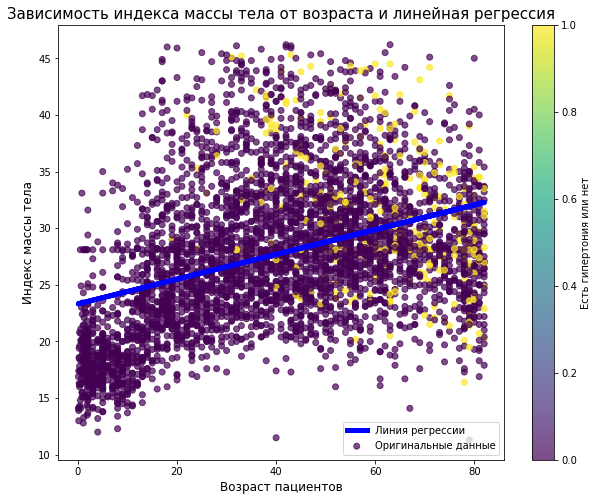

In [220]:
X = new_data['age']
Y = new_data['bmi']
results = scipy.stats.linregress(X, Y)
results.slope, results.intercept
fig, ax = plt.subplots(figsize=[10,8])
graph = ax.scatter(X,Y, label = 'Оригинальные данные',  c=new_data['hypertension'], alpha=0.7)
plt.colorbar(graph, label = 'Есть гипертония или нет')
plt.plot(X, results.slope*X + results.intercept, 'blue', label = 'Линия регрессии', lw=5)
ax.set_title('Зависимость индекса массы тела от возраста и линейная регрессия', fontsize = 15)
ax.set_ylabel('Индекс массы тела', fontsize = 12)
ax.set_xlabel('Возраст пациентов', fontsize = 12)
plt.legend()
plt.show()

Другая наша гипотеза относилась к тому, что индекс массы тела завивисит от возраста. Считая корреляцию, мы заметили, что связь между этими переменными слегка умеренная (без выбросов коэффициент примерно 0.37) с положительной зависимостью. Интересно было посмотреть график рассеяния этих переменных. Действительно, переменные находятся в слабой связи (хаотичное распределение значений на графике, но есть некое уплотнение в центре в интервале от 20 лет от 60). Мы также добавили линию регрессии, она подтверждает нашу гипотезу о том, что чем больше возраст, тем больше и индекс массы тела (зависимость положительная, слева направо). В дополнение мы решили показать наблюдения, в которых у пациентов есть гипертония - видим, что таких пациентов не так много (желтый цвет, фиолетовый, соответственно, гипертонии нет). 

In [172]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [223]:
def russ(value):
    if (value == 'Private') or (value == 'Self-employed'):
        value = 'Частное предпринимательство'
    elif value == 'Govt_job':
        value = 'Госслужба'
    elif value == 'children':
        value = 'Дети'
    elif value == 'Never_worked':
        value = 'Никогда не работал_а'
    return value
data['work_type_rus'] = data['work_type'].apply(russ)

Text(0.5, 0, 'Виды трудоустройства')

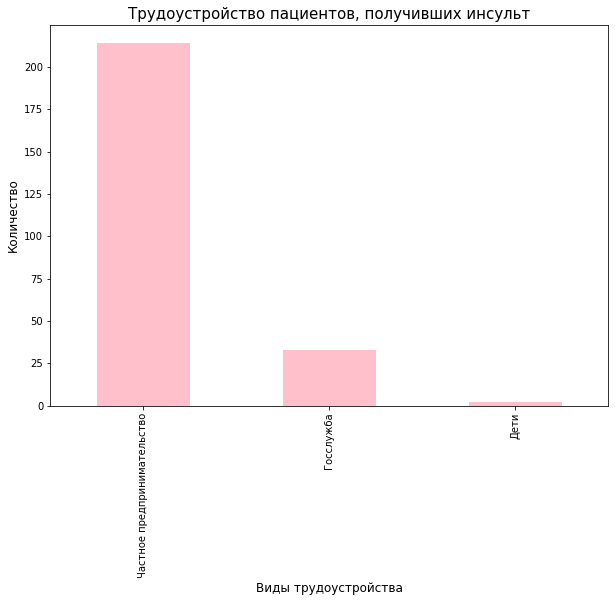

In [230]:
fig, ax = plt.subplots(figsize=[10,7])
sns.set_palette('hls')
ax = data[data['stroke']==1]['work_type_rus'].value_counts().plot(kind='bar', color='pink')
ax.set_title('Трудоустройство пациентов, получивших инсульт', fontsize = 15)
ax.set_ylabel('Количество', fontsize = 12)
ax.set_xlabel('Виды трудоустройства', fontsize = 12)

Text(0.5, 0, 'Виды трудоустройства')

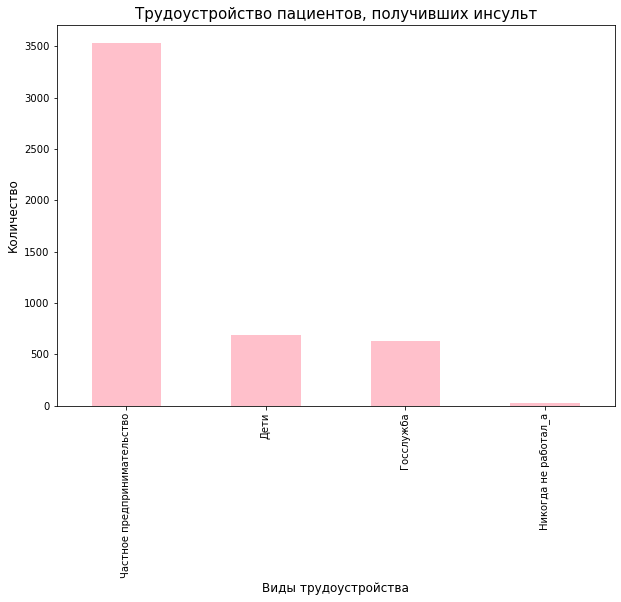

In [232]:
fig, ax = plt.subplots(figsize=[10,7])
sns.set_palette('hls')
ax = data[data['stroke']==0]['work_type_rus'].value_counts().plot(kind='bar', color='pink')
ax.set_title('Трудоустройство пациентов, получивших инсульт', fontsize = 15)
ax.set_ylabel('Количество', fontsize = 12)
ax.set_xlabel('Виды трудоустройства', fontsize = 12)

Ранее мы пытались выяснить, влияет ли работа на получение инсульта, так как работа является источником стресса. Построив столбчатую диаграмму по пациентам, получившим инсульт (из 249 человек), мы видим, что чаще всего инсульт был у пациентов, занимающихся частным предпринимательством (более 200 человек, до этого мы создали новую переменную, в которой объединили показатели Private и Self-employed, так как это одно и то же, и перевели всё на русский язык). Интересно, что намного меньше пациентов, получивших инсульт и работающих в госорганах(примерно 30 из 249 человек), что нам показала и фильтрация.

При этом гипотеза всё-таки опровергается, так как, построив еще одну столбчатую диаграмму по пациентам, не получившим инсульт, мы увидели примерно такое же распределение трудоустройтва (больше частных, намного меньше госсработников и детей, также есть неработающие пациенты), как и в первой диаграмме. По этой причине судить о том, что трудоустройство влияет на получение инсульта неправомерно, у нас мало информации об этом. 

In [236]:
data['age_periodization'].unique()

array(['Пожилые люди', '41-55', '31-40', 'Несовершеннолетние', '18-30'],
      dtype=object)

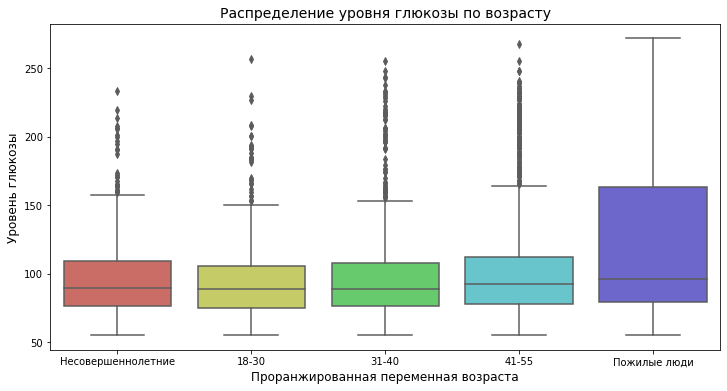

In [237]:
fig, ax = plt.subplots(figsize=[12,6])
sns.color_palette("tab10")
sns.boxplot(x = data['age_periodization'].sort_values(), y = data['avg_glucose_level'], order = ['Несовершеннолетние', '18-30', '31-40', '41-55','Пожилые люди'])
ax.set_title('Распределение уровня глюкозы по возрасту', fontsize = 14)
ax.set_ylabel('Уровень глюкозы', fontsize=12)
ax.set_xlabel('Проранжированная переменная возраста', fontsize=12)
plt.show()

Раннее мы также говорили о том, что уровень глюкозы зависит от возраста (чем больше возраст, тем больше и уровень глюкозы), однако получили крайне малый коэффициент с выбросами и без выбросов (а здесь и вовсе поменялась зависимость). Возраст и уровень глюкозы для нас являются важными факторами риска получения инсульта, в совокупности они могут стать еще более серьезными причинами, поэтому важно посмотреть распределение уровня глюкозы в зависимости от возраста (что мы и сделали на графике). Ящики с усами показали следующее:

1. У нас много выбросов в возрасте от 18-55 (несколько ящиков) и у несовершеннолетних. Получается, что в этих случаях высокий уровень глюкозы, хотя в целом значения варьируются от примерно 80 до 120 для всех ящиков. 
2. Интересно, что у категории пожилых людей выбросов нет, при этом уровень глюкозы довольно высокий (в целом значения распределены от 80 до более 150). 

Не учитывая выбросы, можно сказать, что наша гипотеза в какой-то степени подтверждается (чем больше возраст, тем больше и уровень глюкозы), однако выбросы заставляют задуматься, что так происходит не всегда.  